<a id='top'></a>

# CSCI3022 S22



# Homework 2: Probability and Munging

## Due Friday, February 11 at 11:59 pm to Canvas and Gradescope
***

**Name**: ________________________________________________________________________

***

Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 45 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- There is *not a prescribed API* for these problems.  You may answer coding questions with whatever syntax or object typing you deem fit.  Your evaluation will primarily live in the clarity of how well you present your final results, so don't skip over any interpretations!  Your code should still be commented and readable to ensure you followed the given course algorithm.
- There are two ways to quickly make a .pdf out of this notebook for Gradescope submission.  Either:
 - Use File -> Download as PDF via LaTeX.  This will require your system path find a working install of a TeX compiler
 - Easier: Use File ->  Print Preview, and then Right-Click -> Print using your default browser and "Print to PDF"



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline


## (15 pts) Problem 1: Bayes
***

Brennan and Dale are brothers who love hanging out together, doing activities, playing sports, etc.  Whenever they go on vacation, they do the following:

- 1: Pick a sport to play *at random*.  Between a soccer ball, (American) football, and basketball, they choose one to bring to with them for the entire trip
- 2: Each day they're on vacation they play exactly one game of whatever sportsball they brought.
- 3: They record the winners, but at the end of the trip, they only have record of who won the games, and **not** which sport they were playing!

You know a few things about the two, however.
- Brennan is taller, and wins 75% of their basketball games.
- Dale is stronger, and wins 2/3s of their football games.
- They're evenly matched, and each soccer game is a 50-50 matchup.

Denote $D$ by the event that Dale won a game, $B$ by the event Brennan won, $S$ by the event that they brought a soccer ball and played soccer, $F$ by the event that they brought a football and played football, and $H$ by the event that they brought a basketball and were hoopin'.

**A:**

Suppose they go on a trip that's for a single day, so they only play one game.  What is $P(D)$, the probability that Dale won that game?


**Solution**:

Dale wins any of 3 ways, so we split across them using the Law of Total Probability:
$$P(D)=P(D \cap H) +P(D \cap S)+P(D \cap F) $$
$$P(D)=P(D| H)P(H) +P(D | S)P(S)+P(D | F)P(F)=.472 $$


In [2]:
(1/4)*(1/3)+(1/2)*(1/3)+(2/3)*(1/3)

0.4722222222222222

**B:**

Suppose they go on a trip that's for a single day, and when they return Dale elatedly tells you that he won the game.  What is $P(F|D)$, the probability that the game that Dale won was a game of Football?


**Solution**:

Now we can use Bayes' rule, and we have already computed *both* the denominator and numerator in part **A**!
$$P(F|D)=\frac{P(D \cap F)}{P(D)}=\frac{P(D | F)P(F)}{P(D)}$$
$$P(F|D)=\frac{P(D | F)P(F)}{P(D| H)P(H) +P(D | S)P(S)+P(D | F)P(F)}=.471$$

In [3]:
((2/3)*(1/3))/((1/4)*(1/3)+(1/2)*(1/3)+(2/3)*(1/3))

0.47058823529411764

**C:**

Suppose they go on a trip that's for two days, and when they return Dale brags that we won *both* games.  What is $P(F|D_1 \cap D_2)$, the probability that they brought a Football *given* that Dale won both (the first and the second) games.

**Sanity Check:** It's certainly possible for Dale to win two basketball games in a row, but *when they play* football he's more likely to win two in a row, right?  The probability of the game being football should **increase** the more we see Dale win!

**Solution:**

Since they only pick the game once, the probabilities that are *independent* and turn into products are the consecutive wins **given** we already knew what game was being played.  So we again use Bayes' theorem, but the numerator and the denominator each include terms of the form $P(D_1 \cap D_2 \cap F) $ for "the probability that Dale won two straight games and the game they were playing was Football."

$$P(F|D_1 \cap D_2)=\frac{P(D_1 \cap D_2 \cap F)}{P(D_1 \cap D_2)}=\frac{P(D_1 \cap D_2 | F)P(F)}{P(D_1 \cap D_2)}=\frac{P(D_1| F)P(D_2| F)P(F)}{P(D_1 \cap D_2)}$$
where the denominator is then the larger sum
$$P(D_1 \cap D_2)=P(D_1| H)P(D_2| H)P(H)+P(D_1| S)P(D_2| S)P(S)+P(D_1| F)P(D_2| F)P(F)=.588$$

In [4]:
((2/3)**2*(1/3))/((1/4)**2*(1/3)+(1/2)**2*(1/3)+(2/3)**2*(1/3))

0.5871559633027523

**D:**

Let's generalize!  Suppose they go on a trip that's $n$ days long, and when they return Dale brags that he won *every* game.  What is $P(F|D_1 \cap D_2 \cap \dots D_n)$, the probability that they brought a Football *given* that Dale won all $n$ games?



**Solution:**

$$P(F|D_1 \cap D_2 \dot \cap D_n)=\frac{P(D_1 \cap D_2 \dot \cap D_n \cap F)}{P(D_1 \cap D_2 \dot \cap D_n)}$$
$$=\frac{P(D|F)^n P(F)}{P(D|S)^n P(S)+P(D|H)^n P(H)+P(D|F)^n P(F)}$$
$$=\frac{(2/3)^n (1/3)}{(1/4)^n (1/3)+(1/2)^n (1/3)+(2/3)^n(1/3)}$$


**E:**

Part of the point of using Bayes' theorem in data science is it helps us answer a query like when we have enough data to be "sure."  You should notice in your result from **D** that we're never entirely *sure* that the football was brought, even if Dale rattles off a super long win streak!  But we can get *pretty sure*, up to very high probabilities.  How high did $n$ have to be for there to be a 99% chance that the game was Football?

Provide a numerical answer, and also corroborate with a line plot (`plt.plot`) where the $x$ axis is the length in days of the vacation $n$ and the $y$ axis is $P(F|D_1 \cap D_2 \cap \dots D_n)$, the probability that the game was Football given that Dale won every game played.


In [5]:
def p_f_given_n(n):
    prob=((2/3)**n*(1/3))/((1/4)**n*(1/3)+(1/2)**n*(1/3)+(2/3)**n*(1/3))
    return prob
outcomes=list(range(1,25))
pf_of_n=np.zeros(len(outcomes))
for i in range(len(outcomes)):
    pf_of_n[i]=p_f_given_n(outcomes[i])
    print('Prob of F given ', outcomes[i], ' straight wins for Dale:', pf_of_n[i])

Prob of F given  1  straight wins for Dale: 0.47058823529411764
Prob of F given  2  straight wins for Dale: 0.5871559633027523
Prob of F given  3  straight wins for Dale: 0.6781456953642383
Prob of F given  4  straight wins for Dale: 0.7484012424630002
Prob of F given  5  straight wins for Dale: 0.8033932380415327
Prob of F given  6  straight wins for Dale: 0.8469125671584892
Prob of F given  7  straight wins for Dale: 0.8814248037742589
Prob of F given  8  straight wins for Dale: 0.9086745865183068
Prob of F given  9  straight wins for Dale: 0.9300324185741691
Prob of F given  10  straight wins for Dale: 0.9466393517705017
Prob of F given  11  straight wins for Dale: 0.959457399677442
Prob of F given  12  straight wins for Dale: 0.9692889655336266
Prob of F given  13  straight wins for Dale: 0.9767912789455169
Prob of F given  14  straight wins for Dale: 0.9824929236802663
Prob of F given  15  straight wins for Dale: 0.9868123689410352
Prob of F given  16  straight wins for Dale: 0.99

Text(0,0.5,'Probability')

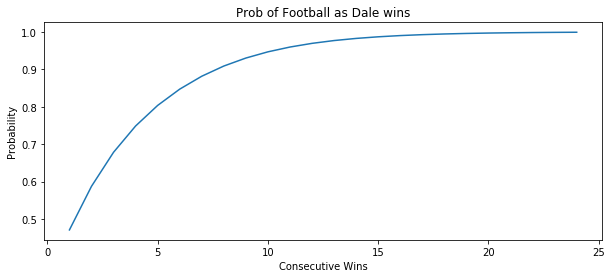

In [6]:
fig, ax=plt.subplots(figsize=(10,4))
plt.plot(outcomes, pf_of_n)
ax.set_title('Prob of Football as Dale wins')
ax.set_title('Prob of Football as Dale wins')
ax.set_xlabel('Consecutive Wins')
ax.set_ylabel('Probability')

From the print statement, we are a little more than 99% in the belief that the game was football after the 16th game.


## (30 pts) Problem 2: Boxplots and Reshaping Data
***

The recent [Marshall fire](https://www.bouldercounty.org/disasters/wildfires/marshall/) has had a devastating and profound effect on many members of the CU community.  As we support those members, we also may be interesting in attempting to understand whether or not we could have anticipated any of the risk factors involved in the fire.  We attempt an exploratory analysis of that here.

Load in the data in `boulder_daily_weather.csv`


Information on the file is as follows:

- Temperatures are in degrees Fahrenheit and snow and precipitation are in inches.
- Precipitation is the total liquid equivalent of all forms of precipitation (rain, snow, hail,...).
- Missing values are indicated by -998.0.
- Trace values (less than 1/10 for snow and 1/100 for rain) are indicated by -999.0.
- Your file starts in 1970, although limited data goes back to 1899 from NOAA.

In [7]:
df=pd.read_csv('../data/boulder_daily_weather.csv', encoding='UTF-8')
print(df.dtypes)
df.head(5)


Year           int64
Month          int64
Day            int64
MaxT           int64
MinT           int64
Precip       float64
Snow           int64
SnowDepth      int64
dtype: object


,Year,Month,Day,MaxT,MinT,Precip,Snow,SnowDepth
0,1970,1,1,32,19,-999.0,-999,3
1,1970,1,2,33,15,0.0,0,3
2,1970,1,3,29,14,0.0,0,2
3,1970,1,4,33,9,0.0,0,2
4,1970,1,5,18,3,0.1,2,4


In [8]:
df.tail(2)

,Year,Month,Day,MaxT,MinT,Precip,Snow,SnowDepth
19030,2021,12,30,44,16,0.00,0,0
19031,2021,12,31,44,25,0.26,4,4


In [9]:
df.describe()

,Year,Month,Day,MaxT,MinT,Precip,Snow,SnowDepth
count,19032.000000,19032.000000,19032.000000,19032.000000,19032.000000,19032.000000,19032.000000,19032.000000
mean,1995.500000,6.513661,15.756831,38.490280,11.295607,-149.310692,-85.292350,-134.096574
std,15.008725,3.451325,8.811761,167.879418,164.444183,356.237912,279.500443,341.239301
min,1970.000000,1.000000,1.000000,-998.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,1982.750000,4.000000,8.000000,51.000000,26.000000,0.000000,0.000000,0.000000
50%,1995.500000,7.000000,16.000000,65.000000,38.000000,0.000000,0.000000,0.000000
75%,2008.250000,10.000000,23.000000,80.000000,51.000000,0.010000,0.000000,0.000000
max,2021.000000,12.000000,31.000000,102.000000,77.000000,9.080000,22.000000,27.000000


### A) Clean and scrub data
We need to pre-process a little to use this, since negative rainfall seems like it might not work well numerically.  Since we're trying to calculate the intensity of the drought, we're also going to make the assumption that "trace" rainfall doesn't actually help with water tables/crops/etc, and that the "missing" values might as well be "0's".

- Replace all "trace" fill values with 0
- Replace all "missing" data values with 0

We'll work with only the `Precip` column here, but feel free to clean the other columns if you wish.

In [10]:
df.loc[df['Precip']==-999,'Precip']=0
df.loc[df['Precip']==-998,'Precip']=0

In [11]:
df.describe()

,Year,Month,Day,MaxT,MinT,Precip,Snow,SnowDepth
count,19032.000000,19032.000000,19032.000000,19032.000000,19032.000000,19032.000000,19032.000000,19032.000000
mean,1995.500000,6.513661,15.756831,38.490280,11.295607,0.054220,-85.292350,-134.096574
std,15.008725,3.451325,8.811761,167.879418,164.444183,0.199848,279.500443,341.239301
min,1970.000000,1.000000,1.000000,-998.000000,-999.000000,0.000000,-999.000000,-999.000000
25%,1982.750000,4.000000,8.000000,51.000000,26.000000,0.000000,0.000000,0.000000
50%,1995.500000,7.000000,16.000000,65.000000,38.000000,0.000000,0.000000,0.000000
75%,2008.250000,10.000000,23.000000,80.000000,51.000000,0.010000,0.000000,0.000000
max,2021.000000,12.000000,31.000000,102.000000,77.000000,9.080000,22.000000,27.000000


### B) Explore a Pattern

What months are the most dangerous for low-rainfall conditions?  Make a new data frame that totals the precipitation for each month since 1970.  The result should be 12 columns for the months and 52 rows for the years. Then create a box plot of the data, resulting in 12 side-by-side plots of monthly precipitation.  Which month looks to be the wettest?  The driest? The most variable?

(*Hint:* I recommend a double loop over `(month, year)` pairs for ease of implementation.)

In [12]:
newdata=np.zeros((52,12))
for mi in range(12):
    for yi in range(52):
        month=mi+1
        year=yi+1970
        newdata[yi,mi]=np.sum(df.loc[(df['Month']==month)&(df['Year']==year), 'Precip'])
newdf=pd.DataFrame(data=newdata, columns=range(1,13))

In [13]:
newdf.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,0.10,0.03,3.86,0.63,1.17,2.61,1.35,0.20,3.83,1.09,1.60,0.18
1,0.51,1.36,0.78,6.01,2.00,0.41,1.37,0.10,4.21,0.72,0.56,0.66
2,1.15,0.44,0.68,1.52,1.22,3.66,2.24,1.79,1.18,1.26,2.15,1.14
3,1.09,0.17,1.74,4.42,4.88,0.48,1.14,0.32,2.31,0.69,1.84,1.13
4,0.90,1.07,1.22,3.07,0.00,2.08,0.51,0.37,2.13,2.24,1.06,0.46


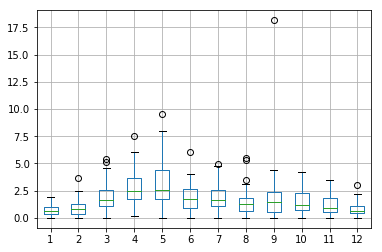

In [14]:
newdf.boxplot()

**Solution:**

May is both the wettest (highest median and quartiles) and the most variable (tallest box).  Driest is a little tougher, but visually is either January or December.

For the rest of the problem, we will use the original data frame with the **daily** data.

### C) Create four new columns to track drought intensity:

- `DaysRainless` that holds the number of days since the last non-trace precipitation.  In other words, this column will have a "0" if there was Precip>0 on that day, and otherwise will hold the number of days back since the last observed Precip>0.

- `DaysUnimpressive` that holds the number of days since the last *significant* precipitation, where it rained at least .1 inches in a calendar day.  In other words, this column will have a "0" if there was Precip>.1 on that day, and otherwise will hold the number of days back since the last observed Precip>.10.

- `Precip30` that holds the cumulative amount of precipitation in the last 30 days.
 
- `Precip120` that holds the cumulative amount of precipitation in the last 120 days.

Because each of these look "backwards" and require data prior to date you enter them in, you may begin calculating them starting in 1971, then remove or `drop` the 1970 data from the data frame afterwards.

(*Hints*: A simple loop should be good for all of these, but careful with using indices: 1970 was a leap year!  I recommend using slicing to "go back" 30/120 days for the Precip variables, and using a counter/incrementor to count "days since" on the other two.)

In [15]:
DRctr=0
P30=0
P120=0
DIctr=0
#doing just the indicator/counters for year 1, then the averages for later years
for i in range(366):
    if df.loc[i,'Precip']>0:
        DRctr=0
    else: DRctr+=1
    df.loc[i,'DaysRainless']=DRctr
    
    if df.loc[i,'Precip']>.1:
        DIctr=0
    else: DIctr+=1
    df.loc[i,'DaysUnimpressive']=DIctr

In [16]:
for i in range(366, len(df)):
    if df.loc[i,'Precip']>0:
        DRctr=0
    else: DRctr+=1
    df.loc[i,'DaysRainless']=DRctr
    
    if df.loc[i,'Precip']>.1:
        DIctr=0
    else: DIctr+=1
    df.loc[i,'DaysUnimpressive']=DIctr
    
    df.loc[i,'Precip30']=np.sum(df.loc[(i-30):i,'Precip'])
    df.loc[i,'Precip120']=np.sum(df.loc[((i-120)):i,'Precip'])


In [17]:
df=df[df['Year']>1970]

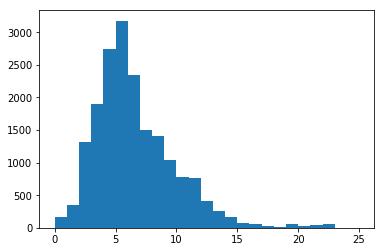

In [18]:
plt.hist(df.loc[366:,'Precip120'], bins=np.linspace(0,25,26)); #not needed, but heres results of 120-day-precip

### D) Measure Extremity

Suppose we were tasked with using data-based methods to predict fire risk based on this data.  One way we might do so is determine where or not the weather has been unsually dry in the recent months.  There are two common ways we measure "extremity" of an observation (among others).

- A **Z-score**.  The **Z-score** for an observation $X_i$ is given by $$Z_i=\frac{X_i-\bar{X}}{s_X},$$where $\bar{X}$ are the mean and standard deviation of the data $X$, as usual.  We interpret it with the sentence: how many standard deviations above or below the average value for $X$ was the $i$th observation?  Values near 0 are "close to average" and values exceeding $\pm 2$ tend to be considered "large."

- A proportion.  A data is extreme if it is one of the largest or smallest observations in a data set.  We can compute it by counting the *proportions* of data values less than or greater than the observation in question.  In other words: a drought might be considered extreme if only 1% of days had **less** recent rainfall, or if only 1% of days had **more** days-since-last-precipitation. 

Using these measures, calculate "how extreme" the drought in Boulder on Dec 30 2021 was.  Output your results into a 4x2 table where each row is one of the 4 measures created in **C** and the two columns are Z-scores and "extremity proportion."

In [19]:
z_dr=(df.loc[19030,'DaysRainless']-np.mean(df['DaysRainless']))/np.std(df['DaysRainless'], ddof=1)
z_du=(df.loc[19030,'DaysUnimpressive']-np.mean(df['DaysUnimpressive']))/np.std(df['DaysUnimpressive'], ddof=1)
z_p30=(df.loc[19030,'Precip30']-np.mean(df['Precip30']))/np.std(df['Precip30'], ddof=1)
z_p120=(df.loc[19030,'Precip120']-np.mean(df['Precip120']))/np.std(df['Precip120'], ddof=1)

prop_dr=np.sum(df['DaysRainless']>df.loc[19030,'DaysRainless'])/len(df)
prop_du=np.sum(df['DaysUnimpressive']>df.loc[19030,'DaysUnimpressive'])/len(df)
prop_p30=np.sum(df['Precip30']<df.loc[19030,'Precip30'])/len(df)
prop_p120=np.sum(df['Precip120']<df.loc[19030,'Precip120'])/len(df)

print('Stats for DaysRainless; Dec 30 measured',df.loc[19030,'DaysRainless'], z_dr, prop_dr)
print('Stats for DaysUnimpressive; Dec 30 measured',df.loc[19030,'DaysUnimpressive'], z_du, prop_du)
print('Stats for Precip30; Dec 30 measured',df.loc[19030,'Precip30'], z_p30, prop_p30)
print('Stats for Precip120; Dec 30 measured',df.loc[19030,'Precip120'], z_p120, prop_p120)

Stats for DaysRainless; Dec 30 measured 6.0 -0.00115718517351914 0.2437051323261545
Stats for DaysUnimpressive; Dec 30 measured 92.0 4.327496399544752 0.008411014679095682
Stats for Precip30; Dec 30 measured 0.16 -0.9898180138285533 0.052341155041251475
Stats for Precip120; Dec 30 measured 0.9400000000000001 -1.6916644953027793 0.00792885460195007


It was pretty typical for Days Rainless, since the score is "close to the mean" and a full 1/4 of the data set had longer days.  However, the 120-day precipitation measures and "days since major rain" tell a better picture: it was in the most extreme 1% of data values for both scores, and a pretty sizable 92 days (or 4.3 standard deviations) above the average length between reasonable rainfalls in Colorado.

### E) Make some More Pictures

Does it feel like droughts might be getting worse over time?  Make a plot of three side-by-side box plots of the values of `DaysUnimpressive` taken for:
- Years 1971-1990
- Years 1991-2010
- Years 2011-present

Does there appear to be a difference in the boxplots in the medians?   In the Quartiles?  What about in the whiskers or prevalance of outliers?

Numerical box values in [lower quartile, median, upper quartile] tuples:
70-90: [ 2.  7. 15.]
90-10: [ 2.  6. 13.]
10-present: [ 2.  6. 13.]


C:\Users\zacha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


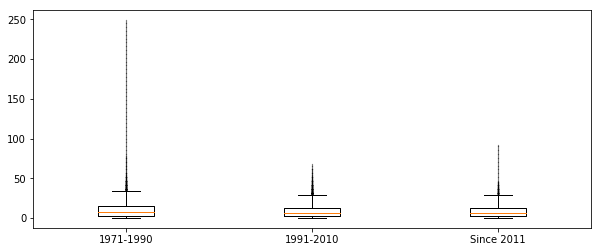

In [62]:
fig, ax=plt.subplots(figsize=(10,4))

early=df.loc[(df['Year']>1970) & (df['Year']<1991), 'DaysUnimpressive']
middle=df.loc[(df['Year']>1990) & (df['Year']<2011), 'DaysUnimpressive']
recent=df.loc[(df['Year']>2010), 'DaysUnimpressive']
              
flierprops = dict(marker='o', markersize=.2) #smaller points make it easier to see here, but aren't needed
ax.boxplot([early,middle,recent], flierprops=flierprops);
ax.set_xticklabels(['1971-1990','1991-2010','Since 2011'])

print("Numerical box values in [lower quartile, median, upper quartile] tuples:")
print("70-90:", np.percentile(early,[25,50,75]))
print("90-10:", np.percentile(middle,[25,50,75]))
print("10-present:", np.percentile(recent,[25,50,75]))

**Solution:**

Based on these measures it doesn't look to be getting any worse: the most recent window has the same box as the 1990-2010 window, and even lower median and upper quartile than the earlier box.

(...maybe you want to check: is there a chance that very long streak in the earliest data included missing data that we "renamed" to be 0?)

### F) Discuss

Does it seem like these measures are working?  Skim the [USGS introductory material](https://www.usgs.gov/faqs/why-doesnt-drought-end-when-it-rains) and its associated pages on droughts and rainfall.  Are our measures able to capture some of the ideas there-in?  Why or why not?  In a markdown cell, use a few sentences to describe strengths and weaknesses of our calculations in estimating drought intensity.

**Solution**:

They're... ok?  It's an attempt to determine things like how much rain actually penetrated the topsoil, but models for things like actual plant hydration/water capacity that might affect things like tree versus grass fires would require a more nuanced look at the geography and biology.  Ideally you learned how hard these things can be to predict though: even those the conditions were **very** bad on December 30, they weren't the worst we've ever seen in terms of driness.  Instead, some combination of the seasonal weather provided the tinder where as the very windy day (and possibly some human interaction) provided the spark that made such an event possible for our city.